In [2]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

To generate the graphs, the polynomial found in part (a) was set to zero for a range of values of $\phi$. In particular, $\phi$ ranged from $0$ to $4\pi$ with a step size of $0.001$.

I used the polynomial libraries from numpy to find the solutions to these polynomials. The method ``polyroots``, which was used to find the solutions, works by numerically approximating the eigenvalues of the polynomial's companion matrix. Its error is large if the roots are far from the origin, or if they are degenerate. The first error is seen not to be an issue by looking at the resulting graphs (none of the points are outside of $[-2, 2] \times [-2, 2]$). The second error is extremely unlikely to occur, so we likely do not need to consider it.

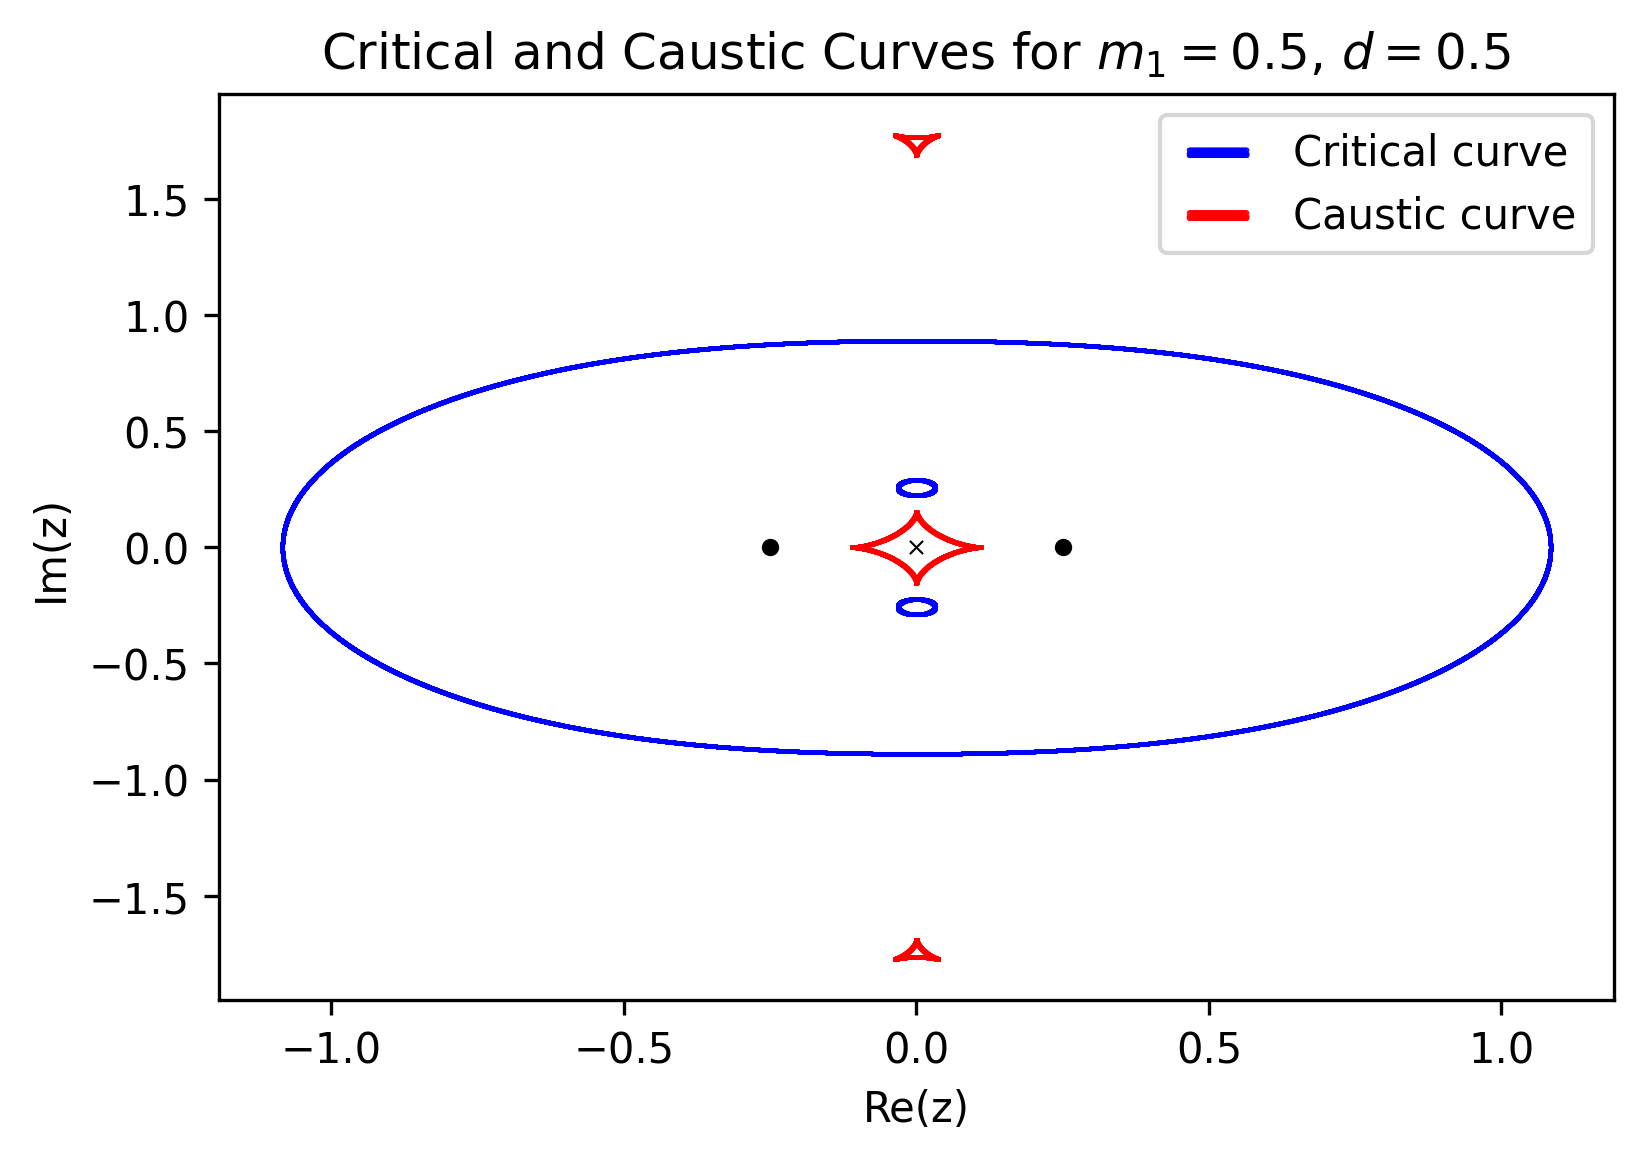

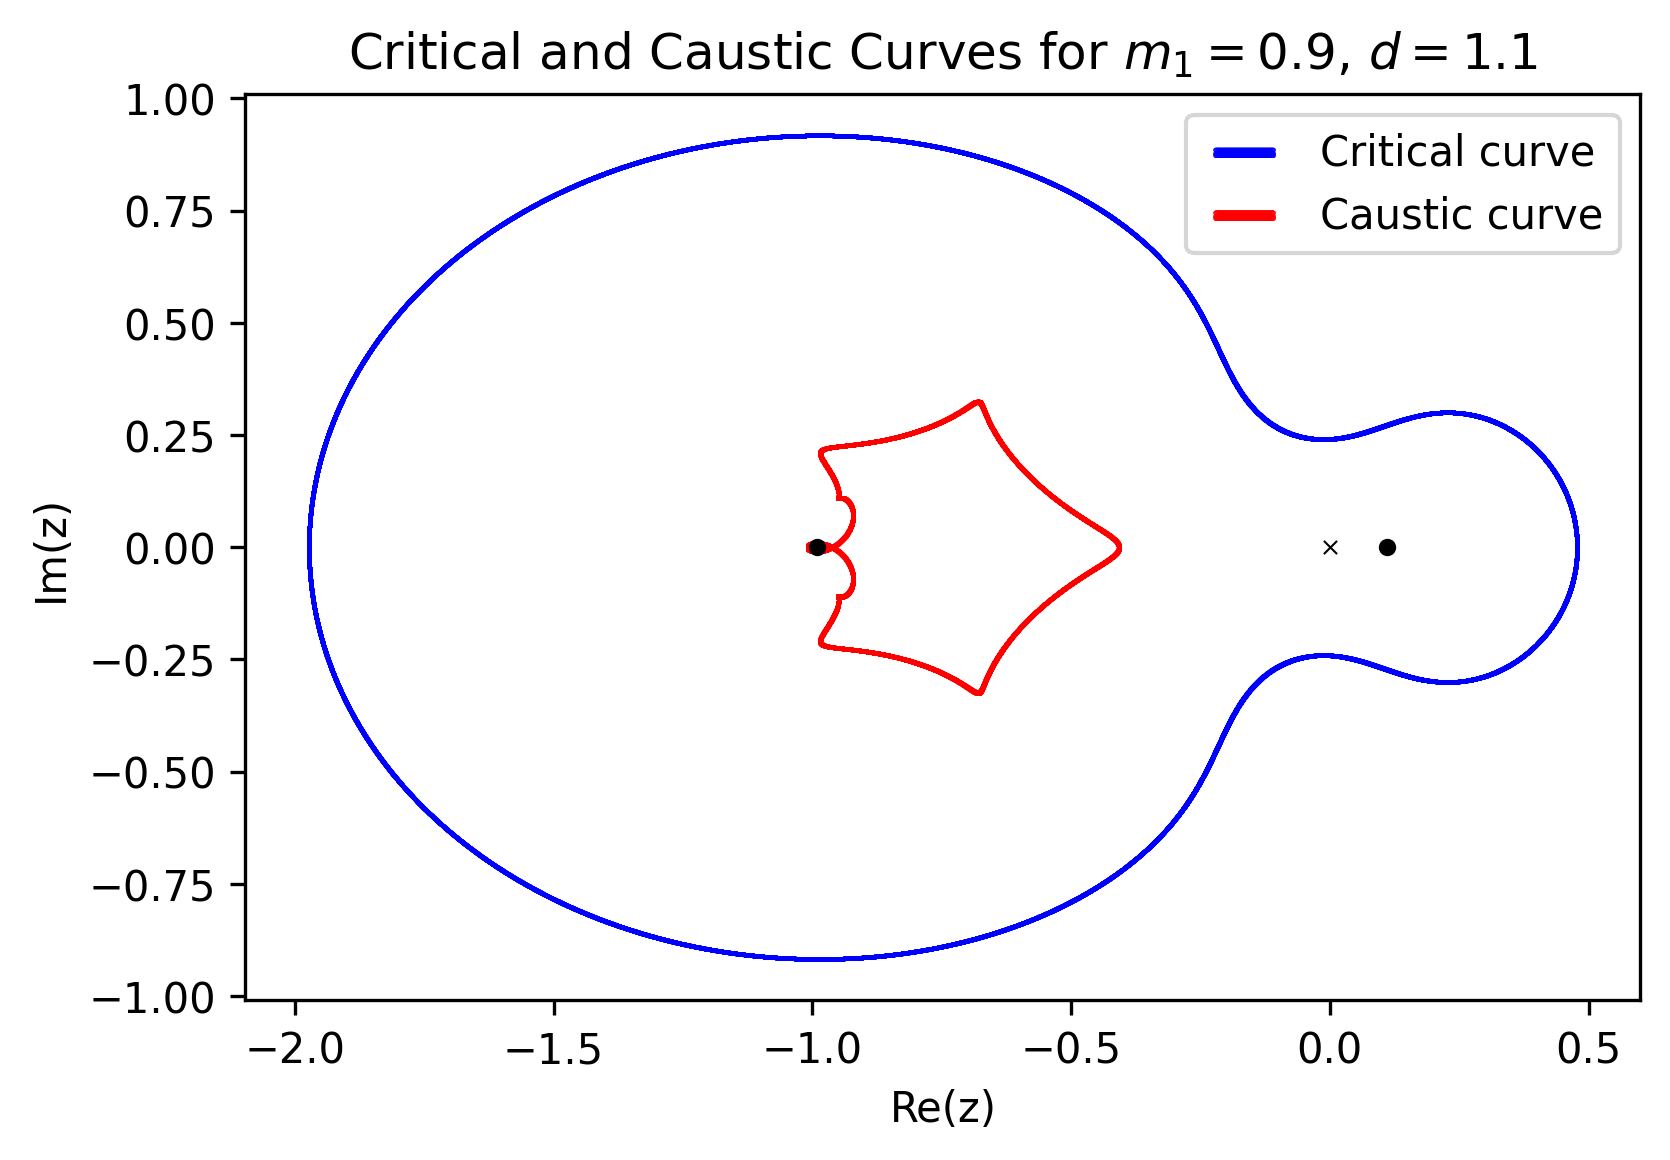

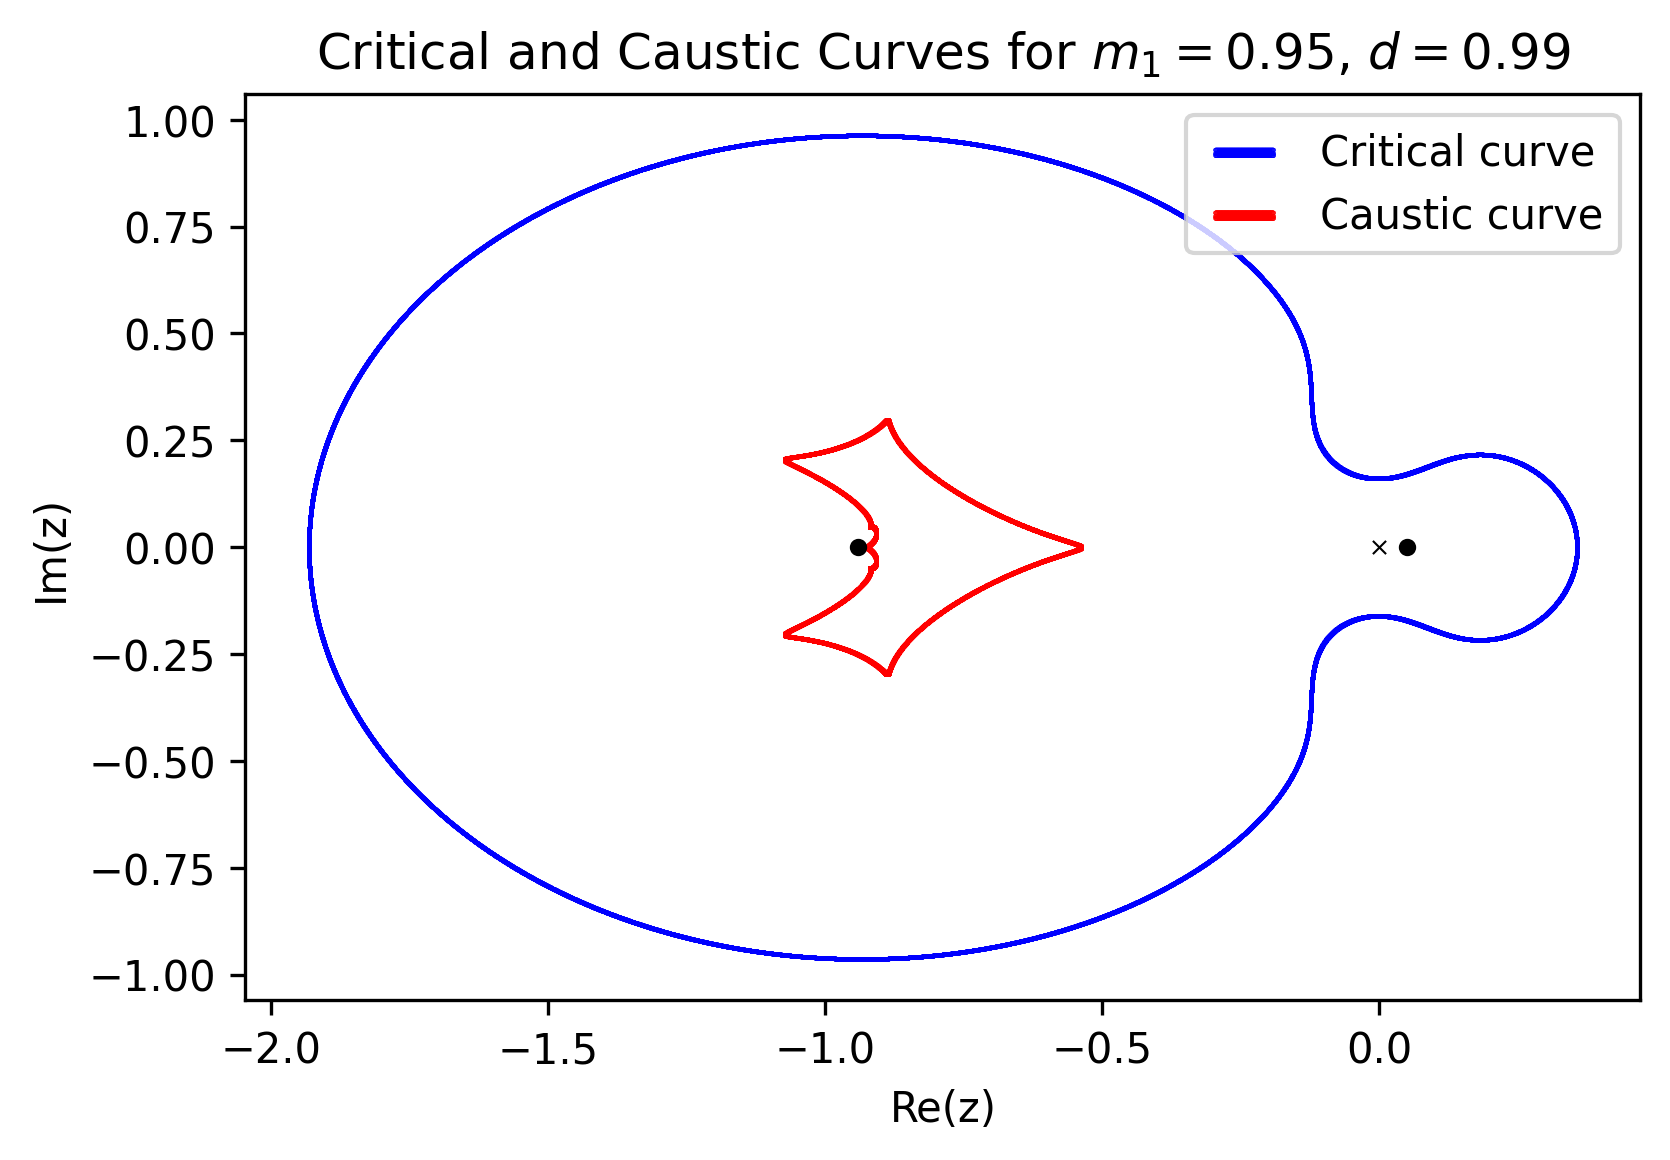

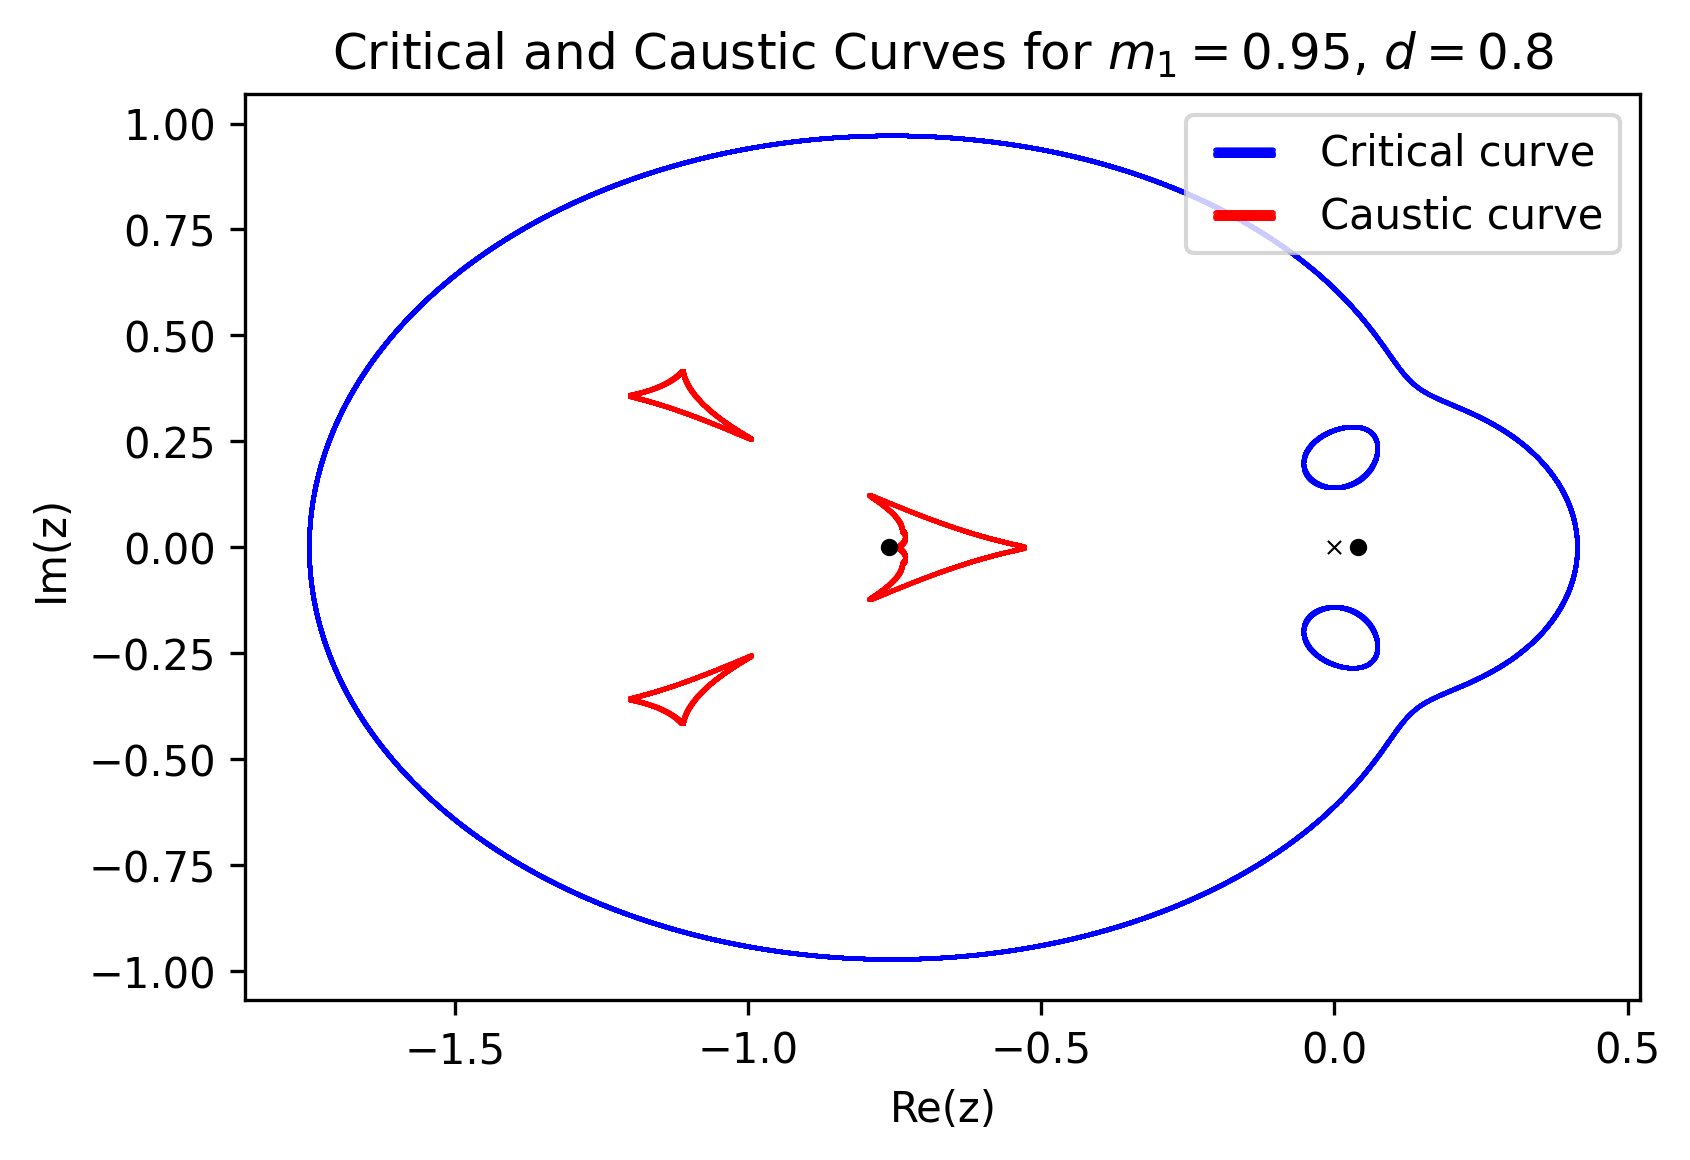

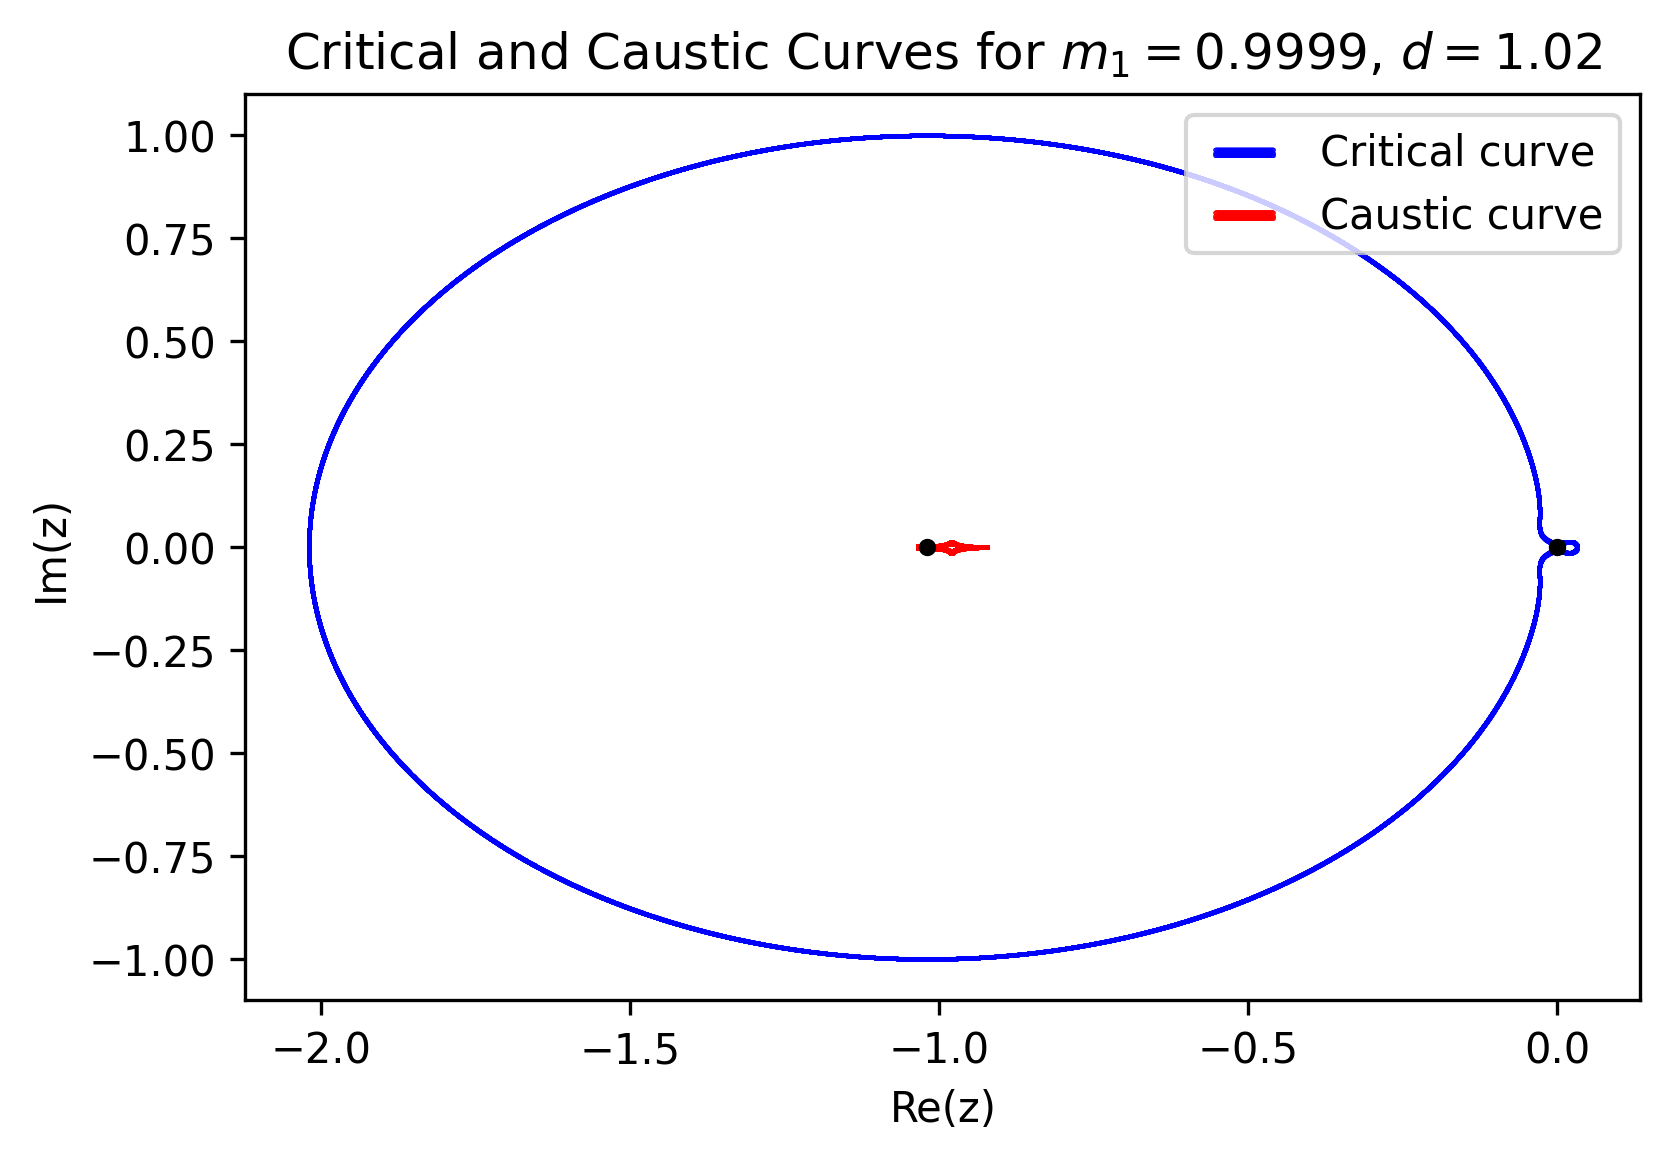

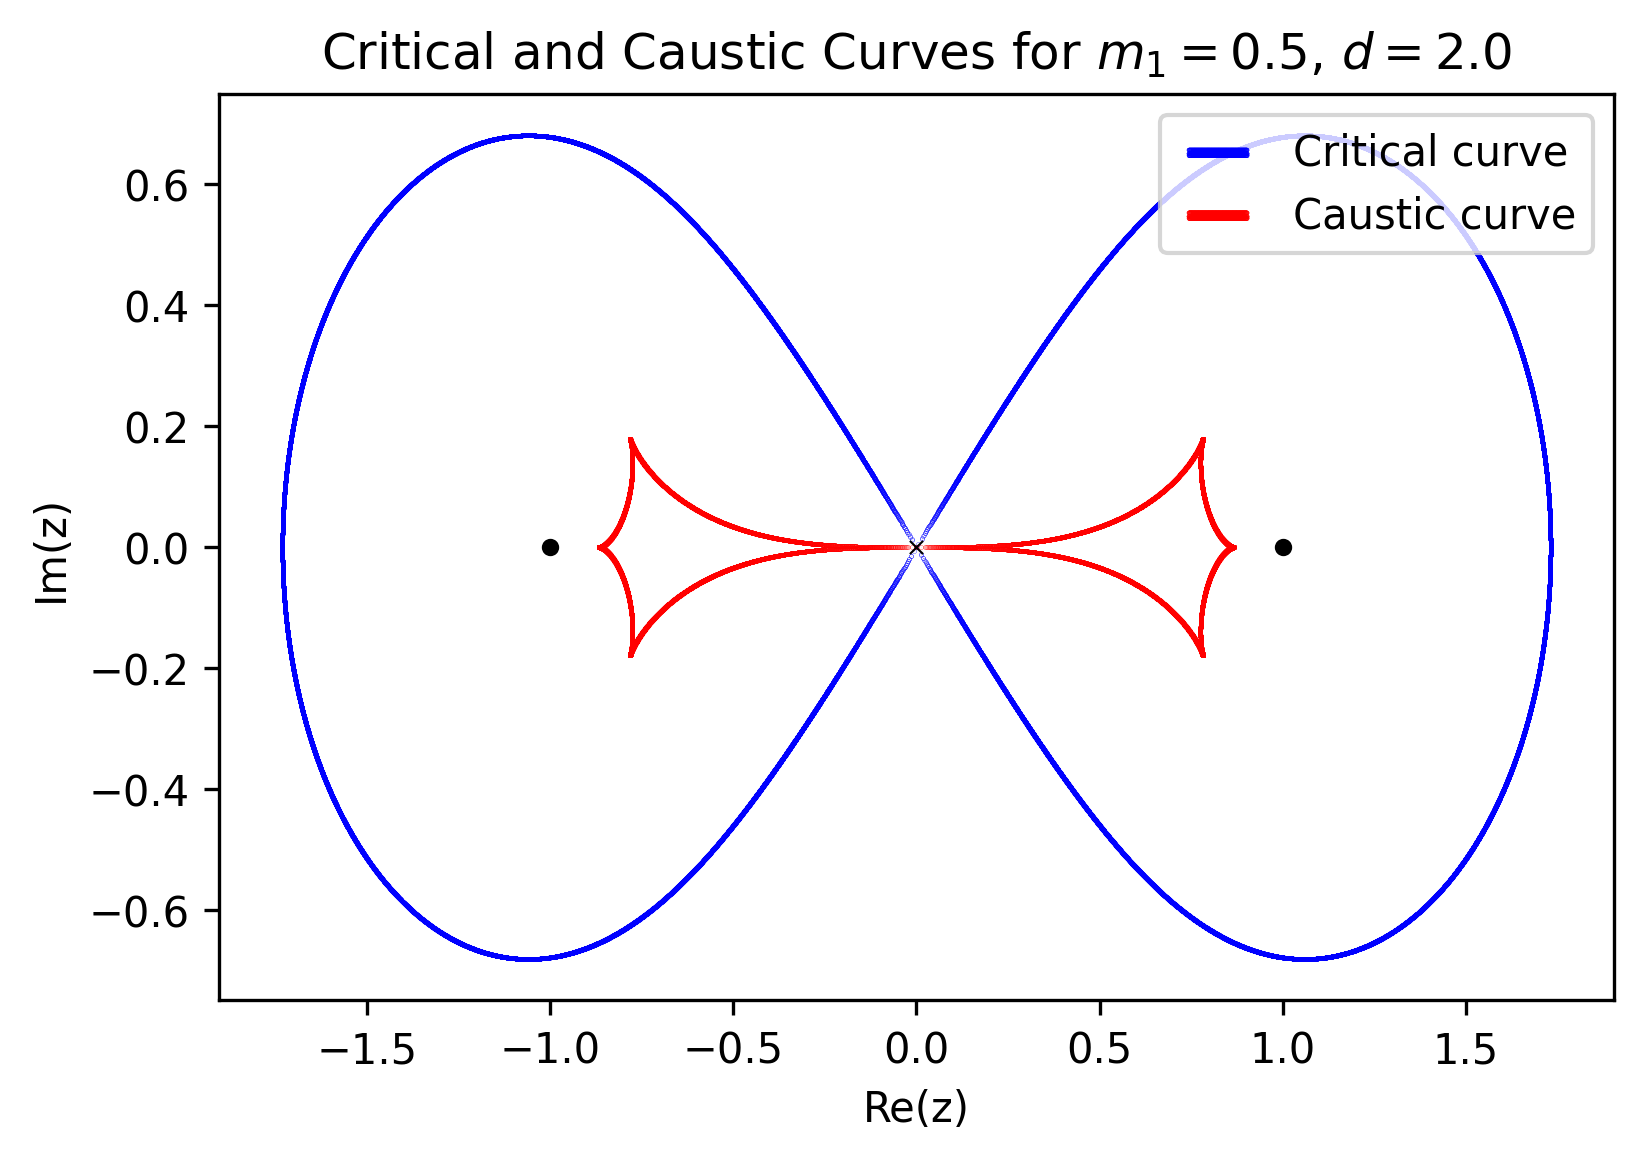

In [8]:
# Defining z1 and z2, the lens positions, from the given parameters.
def z1(m1, d):
    return -m1*d
def z2(m1, d):
    return (1-m1)*d

# Defining the phase factor on its own.
def p(phi):
    return np.exp(1j*phi)

# Defining the critical curve. Inputs are the given parameters m1 
# and d, but also the specific phase being considered. Output is 
# a polynomial object from the polynomial libraries.
def f(phi, m1, d):
    z1bar = np.conjugate(z1(m1, d))
    z2bar = np.conjugate(z2(m1, d))
    a4 = p(phi)
    a3 = -2*p(phi)*(z1bar+z2bar)
    a2 = p(phi)*(z1bar**2 + 4*z1bar*z2bar + z2bar**2) - 1
    a1 = -p(phi)*z1bar*z2bar*(z1bar+z2bar)
    a0 = z1bar*z2bar*(1 + p(phi)*z1bar*z2bar)
    return poly.Polynomial([a0, a1, a2, a3, a4])

# Final phase, step size, and number of steps.
phiF = 4*np.pi
step = 0.001
N = int(phiF/step)

# The following function is what does most of the work. It takes
# as input the parameters m1 and d (as given in the question), 
# and displays a plot of the critical and caustic curves of the
# system.
def critical_curve(m1, d):
    # Initialising image position. Note that there are four positions
    # for each phi, because the polynomial is of degree 4.
    zarray = (1+0j)*np.zeros(4*N)
    
    for i in range(N):
        # Finding and recording the roots of the polynomial at 4pi/N.
        roots = poly.polyroots(f(step*i, m1, d).coef)
        for j in range(len(roots)):
            zarray[4*i+j] = roots[j]
    
    # Calculating the source coordinates using the lens equation.
    z1bar = np.conjugate(z1(m1, d))
    z2bar = np.conjugate(z2(m1, d))
    zarraybar = np.conjugate(zarray)
    causticarray = zarray - m1/(zarraybar - z1bar) - (1-m1)/(zarraybar - z2bar)
    
    
    # Plotting.
    plt.figure(dpi=300)
    plt.title(f'Critical and Caustic Curves for $m_1 = {m1}$, $d = {d}$')
    plt.xlabel('Re(z)')
    plt.ylabel('Im(z)')
    
    # Critical curve.
    plt.scatter(np.real(zarray), -np.imag(zarray), s=0.006, \
                label='Critical curve', color='blue')
    
    # Caustic curve.
    plt.scatter(np.real(causticarray), np.imag(causticarray), s=0.006, \
                label='Caustic curve', color='red')
    
    # Positions of masses and origin.
    plt.scatter(np.real(z1(m1, d)), np.imag(z1(m1, d)), color='black', s=10)
    plt.scatter(np.real(z2(m1, d)), np.imag(z2(m1, d)),color='black', s=10)
    plt.scatter(0, 0, color='black', marker='x', s=10, linewidth=0.5)
    
    plt.legend(scatterpoints=1000, loc='upper right')
    plt.show()

# Generating curves for each of the six parameter choices.
critical_curve(0.5, 0.5)            # (a)
critical_curve(0.9, 1.1)            # (b)
critical_curve(0.95, 0.99)          # (c)
critical_curve(0.95, 0.8)           # (d)
critical_curve(0.9999, 1.02)        # (e)
critical_curve(0.5, 2.0)            # (f)